# Stocks and Music
---

## Premise
#### The financial desicions we make and our music listening habits, repectively, are indicators of our individual outlook and/ or mood.


## Data Sources
* Public Historical Exchange Data
* Spotify for Developers
    * https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features
* Kaggle Daily Charts Over 3 Years
    * https://www.kaggle.com/datasets/pepepython/spotify-huge-database-daily-charts-over-3-years?resource=download


## Audio Feature Definitions:

#### Energy
* Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

#### Valence
* Spotify uses "valence" to describe the musical positiveness conveyed by a track. Tracks with high valence sound more positive (happy, cheerful, euphoric), while tracks with low valence sound more negative (sad, depressed, angry).

#### Tempo
* The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

#### Danceability
* Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import warnings

# Ignore pink warnings for presentation
warnings.filterwarnings('ignore')

# Smith & Wesson Brands Inc and Music
### Do major catastrophic events (I.e. a mass shooting) impact the stock performance of gun/ammo manufactures and does it correlate with changes in people’s music preferences?
#### Smith & Wesson Brands Inc (SWBI)
* Smith & Wesson Brands, Inc. is an American firearm manufacturer.

### Stock

In [2]:
df = pd.read_csv("SWBI.csv")

In [3]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [4]:
df_clean = df[['Year','Month','Close']]

### Music

In [5]:
df_music = pd.read_csv("clean_music_file.csv")

In [6]:
df_music = df_music[['date', 'position', 'title', 'Genre', 'Explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'anger',
                     'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative',
                     'positive']]

In [7]:
new_date = []
for x in df_music['date']:
    date = x[3] + x[4] + x[2] + x[0] + x[1] + x[5] + x[6] + x[7] + x[8] + x[9]
    new_date.append(date)

In [8]:
df_music['clean_date'] = new_date

In [9]:
df_music_clean = df_music.drop('date', axis=1)

In [10]:
df_music_clean['Month'] = pd.DatetimeIndex(df_music_clean['clean_date']).month
df_music_clean['Year'] = pd.DatetimeIndex(df_music_clean['clean_date']).year

In [11]:
df_music_final = df_music_clean[['title', 'Month', 'Year', 'tempo', 'valence', 'key', 'danceability',
                                 'energy']]

# 1. Create DFs for Each Month

### 2018 - Stock

In [12]:
jan_18 = df_clean.loc[(df_clean['Month']==1) & (df_clean['Year']==2018),:]
feb_18 = df_clean.loc[(df_clean['Month']==2) & (df_clean['Year']==2018),:]
mar_18 = df_clean.loc[(df_clean['Month']==3) & (df_clean['Year']==2018),:]
apr_18 = df_clean.loc[(df_clean['Month']==4) & (df_clean['Year']==2018),:]
may_18 = df_clean.loc[(df_clean['Month']==5) & (df_clean['Year']==2018),:]
jun_18 = df_clean.loc[(df_clean['Month']==6) & (df_clean['Year']==2018),:]
jul_18 = df_clean.loc[(df_clean['Month']==7) & (df_clean['Year']==2018),:]
aug_18 = df_clean.loc[(df_clean['Month']==8) & (df_clean['Year']==2018),:]
sep_18 = df_clean.loc[(df_clean['Month']==9) & (df_clean['Year']==2018),:]
octo_18 = df_clean.loc[(df_clean['Month']==10) & (df_clean['Year']==2018),:]
nov_18 = df_clean.loc[(df_clean['Month']==11) & (df_clean['Year']==2018),:]
dec_18 = df_clean.loc[(df_clean['Month']==12) & (df_clean['Year']==2018),:]

### 2018 - Stock

In [13]:
jan_19 = df_clean.loc[(df_clean['Month']==1) & (df_clean['Year']==2019),:]
feb_19 = df_clean.loc[(df_clean['Month']==2) & (df_clean['Year']==2019),:]
mar_19 = df_clean.loc[(df_clean['Month']==3) & (df_clean['Year']==2019),:]
apr_19 = df_clean.loc[(df_clean['Month']==4) & (df_clean['Year']==2019),:]
may_19 = df_clean.loc[(df_clean['Month']==5) & (df_clean['Year']==2019),:]
jun_19 = df_clean.loc[(df_clean['Month']==6) & (df_clean['Year']==2019),:]
jul_19 = df_clean.loc[(df_clean['Month']==7) & (df_clean['Year']==2019),:]
aug_19 = df_clean.loc[(df_clean['Month']==8) & (df_clean['Year']==2019),:]
sep_19 = df_clean.loc[(df_clean['Month']==9) & (df_clean['Year']==2019),:]
octo_19 = df_clean.loc[(df_clean['Month']==10) & (df_clean['Year']==2019),:]
nov_19 = df_clean.loc[(df_clean['Month']==11) & (df_clean['Year']==2019),:]
dec_19 = df_clean.loc[(df_clean['Month']==12) & (df_clean['Year']==2019),:]

# 2. Stats for Each Month - Stock

### 2.1 Average Closing Price

In [14]:
df_mean = df_clean.groupby(['Month','Year']).mean().reset_index()
df_mean = df_mean.rename(columns={"Close":"Mean Closing Price"})

In [15]:
df_mean_2 = df_mean.sort_values(["Year","Month"], ascending = True)

### 2.2 p-Values

In [16]:
p_value_prior_month = [0]
p_value_prior_year = [0,0,0,0,0,0,0,0,0,0,0,0]
months = [jan_18, feb_18, mar_18, apr_18, may_18, jun_18, jul_18, aug_18, sep_18, octo_18, nov_18, dec_18,
          jan_19, feb_19, mar_19, apr_19, may_19, jun_19, jul_19, aug_19, sep_19, octo_19, nov_19, dec_19]
counter = 0
while counter < (len(months)):
    if counter < (len(months)-1):
        first_month = months[counter]
        second_month = months[counter+1]
        prior_month_value = stats.ttest_ind(first_month.Close, second_month.Close, equal_var=False)
        p_value_prior_month.append(prior_month_value[1])
    
    if counter > 11:
        month_18 = months[counter]
        month_19 = months[counter-12]
        prior_year_value = stats.ttest_ind(month_18.Close, month_19.Close, equal_var=False)
        p_value_prior_year.append(prior_year_value[1])
    
    counter += 1

In [17]:
df_mean_2.loc[:, "p-value Previous Month"] = p_value_prior_month

In [18]:
df_mean_2.loc[:, "p-value Prior Year's Month"] = p_value_prior_year
df_mean_3 = df_mean_2.reset_index(drop=True)

# 3. Stats for Each Month - Music

### 3.1 Average Scores

In [19]:
df_music_avg_scores = df_music_final.groupby(['Month','Year']).mean().reset_index()

In [20]:
df_music_avg_scores_2 = df_music_avg_scores.sort_values(["Year","Month"], ascending = True)
df_music_avg_scores_3 = df_music_avg_scores_2.loc[(df_music_avg_scores_2['Year']==2018)|(df_music_avg_scores_2['Year']==2019),:]
df_music_avg_scores_4 = df_music_avg_scores_3.reset_index(drop=True)

### 3.2 Join Tables Together

In [21]:
df_full = pd.merge(df_mean_3,df_music_avg_scores_4,on=['Month','Year'])

In [22]:
# 4. Genre Counts

In [23]:
### 4.1 Clean Genre Info

In [24]:
df_music_clean['Genre'].unique()

array(['dance pop', 'pop rap', 'latin', 'cali rap', 'brooklyn drill',
       'pop', 'canadian hip hop', 'canadian pop', 'contemporary country',
       'deep underground hip hop', 'chicago rap',
       'north carolina hip hop', 'bedroom pop',
       'canadian contemporary r&b', 'atl hip hop', 'album rock', 'k-pop',
       'ohio hip hop', 'melodic rap', 'trap', 'australian hip hop',
       'atl trap', 'dfw rap', 'hip hop', 'n-a', 'modern alternative rock',
       'nz pop', 'electropop', 'alternative r&b', 'indie pop', 'sad rap',
       'detroit hip hop', 'reggaeton', 'rap', 'emo rap', 'florida rap',
       'bedroom soul', 'modern rock', 'conscious hip hop',
       'baton rouge rap', 'edm', 'houston rap', 'australian psych',
       'chicago drill', 'memphis hip hop', 'bmore', 'canadian latin',
       'modern indie pop', 'australian pop', 'adult standards', 'pop r&b',
       'k-pop girl group', 'east coast hip hop', 'halloween',
       'barbadian pop', 'gangster rap', 'la indie', 'french s

In [25]:
x = 0
genre_clean = []
while x < len(df_music_clean):
    current_genre = df_music_clean['Genre'][x]
    current_genre = str(current_genre)
    if "pop" in current_genre.lower():
        genre_clean.append('Pop')
    elif "rock" in current_genre.lower():
        genre_clean.append('Rock')
    elif "country" in current_genre.lower():
        genre_clean.append('Country')
    elif "hop" or "rap" in current_genre.lower():
        genre_clean.append('Rap')
    else:
        genre_clean.append('Other')
    x+=1

In [26]:
df_genre_counts = df_music_clean[['Month','Year','title']]
df_genre_counts.loc[:, "Genre"] = genre_clean

In [27]:
df_genre_counts_2 = df_genre_counts.drop_duplicates()

### 4.2 Genre Counts by Month

In [28]:
df_genre_counts_3 = df_genre_counts_2.groupby(['Month', 'Year', 'Genre'], dropna=False).count().reset_index()

In [29]:
df_genre_counts_3 = df_genre_counts_3.rename(columns={"title":"Count"})
df_genre_counts_3 = df_genre_counts_3.loc[(df_genre_counts_3['Year']==2018)|(df_genre_counts_3['Year']==2019),:]

In [30]:
df_rock = df_genre_counts_3.loc[df_genre_counts_3['Genre']=='Rock',:]
df_rock_2 = df_rock.sort_values(["Year","Month"], ascending = True)

df_country = df_genre_counts_3.loc[df_genre_counts_3['Genre']=='Country',:]
df_country_2 = df_country.sort_values(["Year","Month"], ascending = True)

df_pop = df_genre_counts_3.loc[(df_genre_counts_3['Genre']=='Pop'),:]
df_pop_2 = df_pop.sort_values(["Year","Month"], ascending = True)

df_rap = df_genre_counts_3.loc[df_genre_counts_3['Genre']=='Rap',:]
df_rap_2 = df_rap.sort_values(["Year","Month"], ascending = True)

df_other = df_genre_counts_3.loc[df_genre_counts_3['Genre']=='Other',:]
df_other_2 = df_other.sort_values(["Year","Month"], ascending = True)

# 5. Graphs

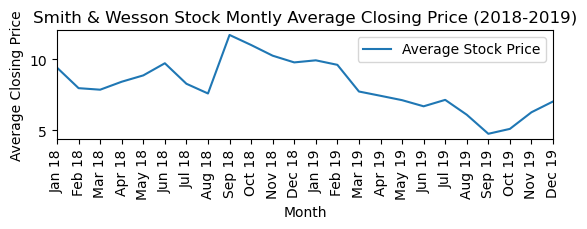

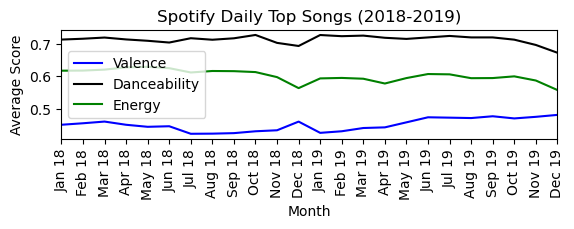

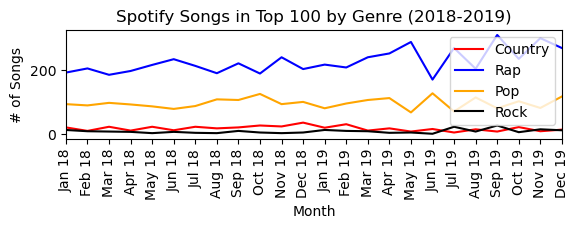

In [31]:
# All
plt.subplot(3, 1, 1)
x_axis = np.arange(1,25)
plt.plot(x_axis, df_mean_3['Mean Closing Price'],label="Average Stock Price")

plt.legend()

months = ['Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18',
          'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19',
          'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19']
plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("Smith & Wesson Stock Montly Average Closing Price (2018-2019)")
plt.show()

# Music All
plt.subplot(3, 1, 2)
# plt.plot(x_axis, df_music_avg_scores_3['tempo'],color="red",label="Tempo")
plt.plot(x_axis, df_music_avg_scores_3['valence'],color="blue",label="Valence")
# plt.plot(x_axis, df_music_avg_scores_3['key'],color="orange",label="Key")
plt.plot(x_axis, df_music_avg_scores_3['danceability'],color="black",label="Danceability")
plt.plot(x_axis, df_music_avg_scores_3['energy'],color="green",label="Energy")

plt.legend()

plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("Average Score")
plt.title("Spotify Daily Top Songs (2018-2019)")
plt.show()

# Genre by Month
plt.subplot(3, 1, 3)
plt.plot(x_axis, df_country['Count'],color="red",label="Country")
plt.plot(x_axis, df_rap['Count'],color="blue",label="Rap")
plt.plot(x_axis, df_pop['Count'],color="orange",label="Pop")
plt.plot(x_axis, df_rock['Count'],color="black",label="Rock")
# plt.plot(x_axis, df_other['Count'],color="green",label="Other")

plt.legend()

plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("# of Songs")
plt.title("Spotify Songs in Top 100 by Genre (2018-2019)")
plt.show()

In [32]:
def regression_line(x_values, y_values, y_name, counter, title, graphs):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    #source:https://stackoverflow.com/questions/485789/why-do-i-get-typeerror-cant-multiply-sequence-by-non-int-of-type-float
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.subplot(graphs, 1, counter)
    plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel("Average Closing Price")
    plt.ylabel(y_name)
    plt.title(f"Closing Price vs. {title} (2018-2019)")
    
    x_mean = x_values.mean()
    y_mean = y_values.mean()
    plt.annotate(line_eq,(x_mean,y_mean),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")

    plt.show()

The r-value is: 0.29307387780982846


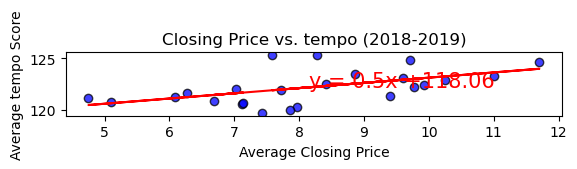

The r-value is: 0.5297921339436817


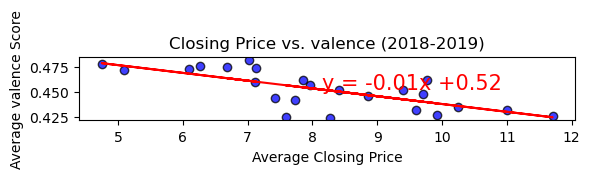

The r-value is: 0.05602947119708898


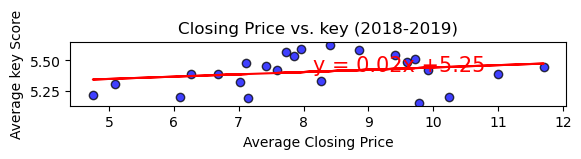

The r-value is: 0.003949421381538337


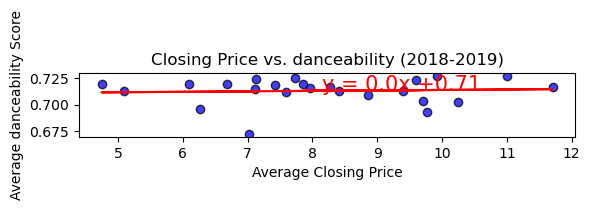

The r-value is: 0.06362583327620434


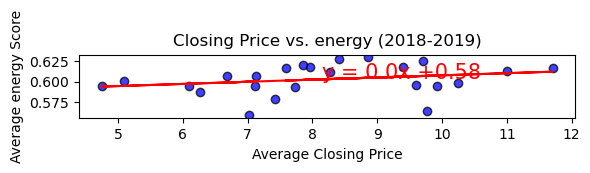

In [33]:
parameters = ['tempo', 'valence', 'key', 'danceability', 'energy']
counter = 1
for x in parameters:
    x_axis = df_full['Mean Closing Price']
    y_axis = df_full[x]
    y_name = (f"Average {x} Score")

    regression_line(x_axis, y_axis, y_name,counter, x, len(parameters))
    counter+=1

The r-value is: 0.24043709900561952


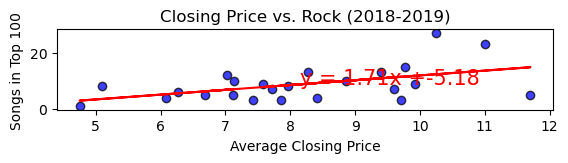

The r-value is: 0.2569672423676602


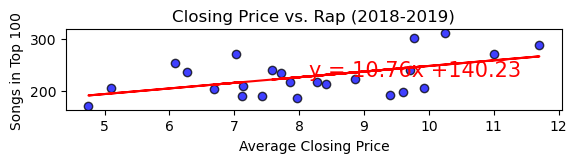

The r-value is: 0.6252454500420633


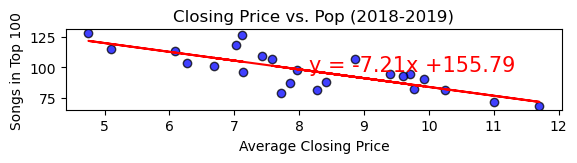

The r-value is: 0.21318627519188


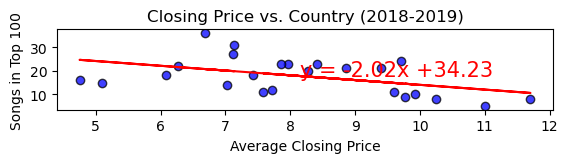

In [34]:
genres = ['Rock', 'Rap', 'Pop', 'Country']
data = [df_rock_2, df_rap_2, df_pop_2, df_country_2]
counter = 1
genre_counter = 0
for x in data:
    x_axis = df_full['Mean Closing Price']
    y_axis = x['Count']
    genre = genres[genre_counter]
    y_name = ("Songs in Top 100")

    regression_line(x_axis, y_axis, y_name,counter,genre,len(data))
    counter+=1
    genre_counter+=1

# The Volatility Index (VIX) and Music
### Is volatility in the stock market a predictor of collective music listening habits, or vice versa?
#### The Volatility Index (VIX)
* AKA "The fear index", the VIX is a real-time index that represents the market’s expectations for the relative strength of near-term price changes of the S&P 500 Index. It is a forward-looking projection of how fast stock prices will change, and in general is a gauge of market sentiment (i.e. how affraid are investors).


In [35]:
# VIX data file path
vix_csv = "vix.csv"

# Read VIX data file and store into Pandas DataFrame
vix_df = pd.read_csv(vix_csv)

In [36]:
# Convert date column to datetime and set as index to generate monthly averages for VIX data
vix_df["DATE"] = pd.to_datetime(vix_df["DATE"])

vix_df.set_index('DATE', inplace=True)


In [37]:
# Drop all columns but date and close and return monthly average close for VIX data
vix_df_mean = vix_df.resample('MS').mean()

vix_df_mean = vix_df_mean[["CLOSE"]]


In [38]:
# Music date file path
music_csv = "clean_music_file.csv"

# Read music data file and store into Pandas DataFrame
music_df = pd.read_csv(music_csv)

In [39]:
# Convert date column to datetime and set as index to generate monthly sums for music data
music_df["date"] = pd.to_datetime(music_df["date"],format="%d/%m/%Y",dayfirst=True)

music_df.set_index("date", inplace=True)

In [40]:
# Return monthly sums for music data
music_df_sum = music_df.resample('MS').sum()

In [41]:
# Drop all columns but date and valence for music data
music_mood_df = music_df_sum[["valence"]]

In [42]:
# Merge the resultant VIX and music data
vix_music_merge = pd.merge(vix_df_mean, music_mood_df, how="outer",left_index=True,right_index=True)

In [43]:
# Reset the index for the merged dataframe for plotting
vix_music_df = vix_music_merge.reset_index()

In [44]:
# Drop all NA from the merged dataframe for plotting and regression
vix_music_df = vix_music_df.dropna()

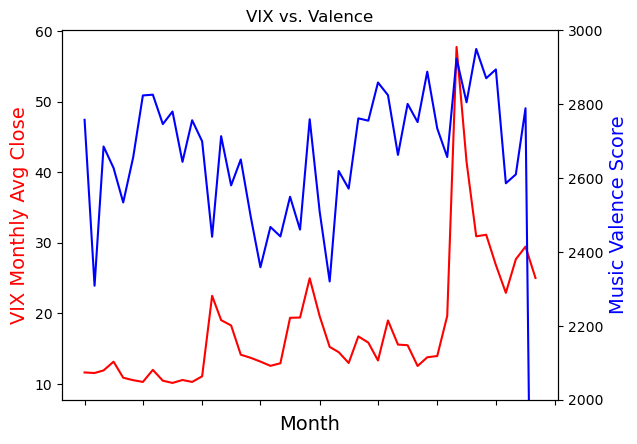

In [45]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots()

# Plot the left axis
ax.plot(vix_music_df["index"],vix_music_df["CLOSE"],color="red")
ax.set_xlabel("Month", fontsize = 14)
ax.set_ylabel("VIX Monthly Avg Close",color="red",fontsize=14)
ax.set(xticklabels=[]) 

# Create the second axis using twinx()
ax2 = ax.twinx()

# Plot the right axis
ax2.plot(vix_music_df["index"], vix_music_df["valence"],color="blue")
ax2.set_ylabel("Music Valence Score",color="blue",fontsize=14)
ax2.set_ylim(2000,3000)

plt.title("VIX vs. Valence")

plt.show()

## Bottom Line
### Malarkey. There is no correlation or predictive nature between music and stock market volatility.

The r-squared is: 0.0022625844516715233


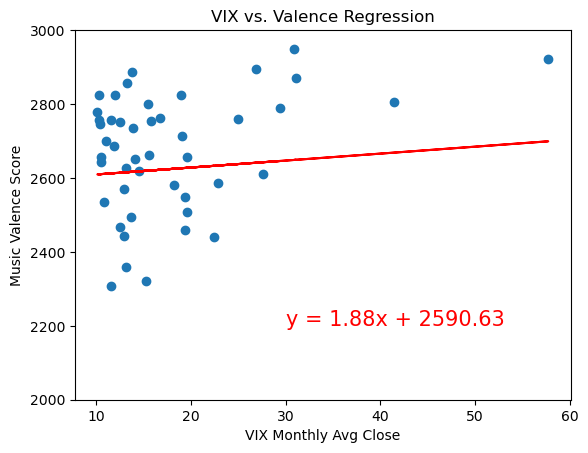

In [46]:
# Plot linear regression
x_values = vix_music_df["CLOSE"]
y_values = vix_music_df["valence"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,2200),fontsize=15,color="red")
plt.xlabel("VIX Monthly Avg Close")
plt.ylabel("Music Valence Score")
plt.ylim(2000,3000)
print(f"The r-squared is: {rvalue**2}")

plt.title("VIX vs. Valence Regression")

plt.show()

# Music to Stock Exploratory Data Analsyis

Using the **VIX Stock** and **Spotify Top Hits Data** this EDA seeks to analyse a possible correlation between Muisc listening Trends and Stock Market Interactions.

### Can Music on Spotify Shed light on Stock Market Returns?
**Hypothesis**: The type of music people listen to at any given moment is a reflection of their mood and influences how they choose to use their money

A key assumption had to be made for this EDA to have a firm logical ground

**Assumption**: People listen to music that reflects the mood they are currently experienceing, rather than listening to music to change their mood.

### STOCKS
Loading and cleaning the VixStockIndex csv file

In [47]:
# loading stock data
vix_stock_data = pd.read_csv('VixStockIndex.csv')
vix_stock_data['Date'] = pd.to_datetime(vix_stock_data['Date'], format='%Y/%m/%d')
vix_stock_data['Date'] = pd.to_datetime(vix_stock_data['Date'])

In [48]:
# splitting up the 'date' column into 'Day', 'Month', and 'Year'
vix_stock_data['Month'] = pd.DatetimeIndex(vix_stock_data['Date']).month
vix_stock_data['Day'] = pd.DatetimeIndex(vix_stock_data['Date']).day
vix_stock_data['Year'] = pd.DatetimeIndex(vix_stock_data['Date']).year
vix_stock_data = vix_stock_data.loc[vix_stock_data['Year'].isin([2018, 2019])]

In [49]:
# cleaning data and retaining colums we need for analysis : 'Month','Day','Year' and 'Close' (closing price)
vix_stock_data_clean = vix_stock_data.loc[:, ['Month','Day','Year','Close']]

### SPOTIFY 
Loading and cleaning the 'clean_music_file'

In [50]:
# Load Spotify top charts data
spotify_data = pd.read_csv('clean_music_file.csv')
spotify_data['date'] = pd.to_datetime(spotify_data['date'], format='%d/%m/%Y')
spotify_data.reset_index()

,index,date,position,track,title,artist,Country,Uri,Album/Single,Genre,...,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,key_notes
0,0,2020-11-05,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,C
1,1,2020-11-04,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,C
2,2,2020-11-03,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,C
3,3,2020-11-02,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,C
4,4,2020-11-01,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270103,270103,2017-01-01,186.0,"ABC , The Jackson 5",ABC,The Jackson 5,USA,https://open.spotify.com/track/6cb0HzFQPN4BGAD...,album,motown,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,"G♯, A♭"
270104,270104,2017-01-01,189.0,"Wonderful World - Remastered , Sam Cooke",Wonderful World - Remastered,Sam Cooke,USA,https://open.spotify.com/track/27K3ZDS5B4fwjhw...,album,adult standards,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,B
270105,270105,2017-01-01,193.0,Satisfaction - Mono Version / Remastered 200...,Satisfaction - Mono Version / Remastered 2002,The Rolling Stones,USA,https://open.spotify.com/track/7fSGbZLhWlAiCC3...,album,album rock,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,D
270106,270106,2017-01-01,199.0,"You Can't Hurry Love - 2016 Remaster , Phil C...",You Can't Hurry Love - 2016 Remaster,Phil Collins,USA,https://open.spotify.com/track/4YwbSZaYeYja8Um...,album,mellow gold,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,G


In [51]:
spotify_data = spotify_data[['date', 'position', 'title', 'Genre', 'Explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'anger',
                     'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative',
                     'positive']]

In [52]:
# splitting up the 'date' column into 'Day', 'Month', and 'Year'
spotify_data['Month'] = pd.DatetimeIndex(spotify_data['date']).month
spotify_data['Day'] = pd.DatetimeIndex(spotify_data['date']).day
spotify_data['Year'] = pd.DatetimeIndex(spotify_data['date']).year

In [53]:
# cleaning data and retaining colums we need for analysis
spotify_data_final = spotify_data[['title', 'Month', 'Day', 'Year', 'tempo', 'valence', 'key', 'danceability',
                                 'energy']]

In [54]:
# assigning months in 2018 their corresposning number and year
jan_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==1) & (vix_stock_data_clean['Year']==2018),:]
feb_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==2) & (vix_stock_data_clean['Year']==2018),:]
mar_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==3) & (vix_stock_data_clean['Year']==2018),:]
apr_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==4) & (vix_stock_data_clean['Year']==2018),:]
may_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==5) & (vix_stock_data_clean['Year']==2018),:]
jun_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==6) & (vix_stock_data_clean['Year']==2018),:]
jul_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==7) & (vix_stock_data_clean['Year']==2018),:]
aug_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==8) & (vix_stock_data_clean['Year']==2018),:]
sep_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==9) & (vix_stock_data_clean['Year']==2018),:]
octo_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==10) & (vix_stock_data_clean['Year']==2018),:]
nov_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==11) & (vix_stock_data_clean['Year']==2018),:]
dec_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==12) & (vix_stock_data_clean['Year']==2018),:]

In [55]:
# assigning months in 2019 their corresposning number and year
jan_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==1) & (vix_stock_data_clean['Year']==2019),:]
feb_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==2) & (vix_stock_data_clean['Year']==2019),:]
mar_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==3) & (vix_stock_data_clean['Year']==2019),:]
apr_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==4) & (vix_stock_data_clean['Year']==2019),:]
may_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==5) & (vix_stock_data_clean['Year']==2019),:]
jun_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==6) & (vix_stock_data_clean['Year']==2019),:]
jul_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==7) & (vix_stock_data_clean['Year']==2019),:]
aug_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==8) & (vix_stock_data_clean['Year']==2019),:]
sep_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==9) & (vix_stock_data_clean['Year']==2019),:]
octo_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==10) & (vix_stock_data_clean['Year']==2019),:]
nov_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==11) & (vix_stock_data_clean['Year']==2019),:]
dec_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==12) & (vix_stock_data_clean['Year']==2019),:]

In [56]:
# resetting stock indexes
stock_mean = vix_stock_data_clean.groupby(['Month','Year']).mean().reset_index()
stock_mean = stock_mean.rename(columns={"Close":"Mean Closing Price"})

In [57]:
# reordering stock data in ascending order by date
stock_mean_clean = stock_mean.sort_values(["Year","Month"], ascending = True)

In [58]:
p_value_prior_month = [0]
p_value_prior_year = [0,0,0,0,0,0,0,0,0,0,0,0]
months = [jan_18, feb_18, mar_18, apr_18, may_18, jun_18, jul_18, aug_18, sep_18, octo_18, nov_18, dec_18,
          jan_19, feb_19, mar_19, apr_19, may_19, jun_19, jul_19, aug_19, sep_19, octo_19, nov_19, dec_19]
counter = 0

In [59]:
while counter < (len(months)):
    if counter < (len(months)-1):
        first_month = months[counter]
        second_month = months[counter+1]
        prior_month_value = stats.ttest_ind(first_month.Close, second_month.Close, equal_var=False)
        p_value_prior_month.append(prior_month_value[1])
    
    if counter > 11:
        month_18 = months[counter]
        month_19 = months[counter-12]
        prior_year_value = stats.ttest_ind(month_18.Close, month_19.Close, equal_var=False)
        p_value_prior_year.append(prior_year_value[1])
    
    counter += 1

In [60]:
stock_mean_clean.loc[:, "p-value Previous Month"] = p_value_prior_month

In [61]:
stock_mean_clean.loc[:, "p-value Prior Year's Month"] = p_value_prior_year
stock_mean_clean_1 = stock_mean_clean.reset_index(drop=True)

In [62]:
# calculating means of using dates
spotify_mean = spotify_data_final.groupby(['Month','Year']).mean()
spotify_mean = spotify_mean.sort_values(by = ['Month','Year'], ascending = [True, True]).reset_index()

In [63]:
# re-indexing the mean spotify data
spotify_mean_1 = spotify_mean.sort_values(["Year","Month"], ascending = True)
spotify_mean_2 = spotify_mean_1.loc[(spotify_mean_1['Year']==2018)|(spotify_mean_1['Year']==2019),:]
spotify_mean_3 = spotify_mean_2.reset_index(drop=True)

In [64]:
# merging stock and spotify dataframes for further analysis
merge_stock_spotify= pd.merge(stock_mean_clean_1,spotify_mean_3,on=['Month','Year'])

In [65]:
# getting genre
spotify_data['Genre'].unique()

array(['dance pop', 'pop rap', 'latin', 'cali rap', 'brooklyn drill',
       'pop', 'canadian hip hop', 'canadian pop', 'contemporary country',
       'deep underground hip hop', 'chicago rap',
       'north carolina hip hop', 'bedroom pop',
       'canadian contemporary r&b', 'atl hip hop', 'album rock', 'k-pop',
       'ohio hip hop', 'melodic rap', 'trap', 'australian hip hop',
       'atl trap', 'dfw rap', 'hip hop', 'n-a', 'modern alternative rock',
       'nz pop', 'electropop', 'alternative r&b', 'indie pop', 'sad rap',
       'detroit hip hop', 'reggaeton', 'rap', 'emo rap', 'florida rap',
       'bedroom soul', 'modern rock', 'conscious hip hop',
       'baton rouge rap', 'edm', 'houston rap', 'australian psych',
       'chicago drill', 'memphis hip hop', 'bmore', 'canadian latin',
       'modern indie pop', 'australian pop', 'adult standards', 'pop r&b',
       'k-pop girl group', 'east coast hip hop', 'halloween',
       'barbadian pop', 'gangster rap', 'la indie', 'french s

In [66]:
# cleaning the genre column in the dataframe
x = 0
genre_clean = []
while x < len(df_music_clean):
    current_genre = df_music_clean['Genre'][x]
    current_genre = str(current_genre)
    if "pop" in current_genre.lower():
        genre_clean.append('Pop')
    elif "rock" in current_genre.lower():
        genre_clean.append('Rock')
    elif "country" in current_genre.lower():
        genre_clean.append('Country')
    elif "hop" or "rap" in current_genre.lower():
        genre_clean.append('Rap')
    else:
        genre_clean.append('Other')
    x+=1

In [67]:
spotify_genre_counts = df_music_clean[['Month','Year','title']]
spotify_genre_counts.loc[:, "Genre"] = genre_clean

In [68]:
# removing duplicates 
spotify_genre_counts_final = spotify_genre_counts.drop_duplicates()

In [69]:
# grouping the genre by months 
spotify_genre_month = spotify_genre_counts.groupby(['Month', 'Year', 'Genre'], dropna=False).count().reset_index()

In [70]:
# creating a 'Count' column to hold the value of genre by months
spotify_genre_month = spotify_genre_month.rename(columns={"title":"Count"})
spotify_genre_month = spotify_genre_month.loc[(spotify_genre_month['Year']==2018)|(spotify_genre_month['Year']==2019),:]

In [71]:
spotify_rock = spotify_genre_month.loc[spotify_genre_month['Genre']=='Rock',:]
spotify_rock_2 = spotify_rock.sort_values(["Year","Month"], ascending = True)

spotify_country = spotify_genre_month.loc[spotify_genre_month['Genre']=='Country',:]
spotify_country_2 = spotify_country.sort_values(["Year","Month"], ascending = True)

spotify_pop = spotify_genre_month.loc[(spotify_genre_month['Genre']=='Pop'),:]
spotify_pop_2 = spotify_pop.sort_values(["Year","Month"], ascending = True)

spotify_rap = spotify_genre_month.loc[spotify_genre_month['Genre']=='Rap',:]
spotify_rap_2 = spotify_rap.sort_values(["Year","Month"], ascending = True)

spotify_other = spotify_genre_month.loc[spotify_genre_month['Genre']=='Other',:]
spotify_other_2 = spotify_other.sort_values(["Year","Month"], ascending = True)

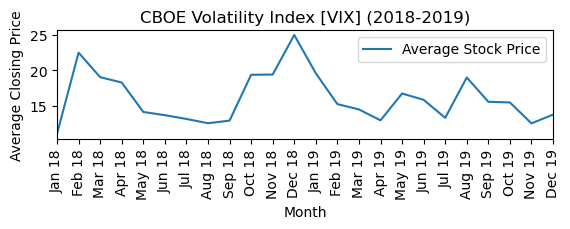

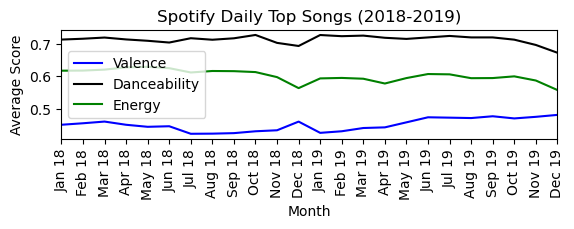

In [72]:
# Stock All
plt.subplot(3, 1, 1)
x_axis = np.arange(1,25)
plt.plot(x_axis, stock_mean_clean_1['Mean Closing Price'],label="Average Stock Price")

plt.legend()

months = ['Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18',
          'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19',
          'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19']
plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("CBOE Volatility Index [VIX] (2018-2019)")
plt.show()

# Music All
plt.subplot(3, 1, 2)
# plt.plot(x_axis, df_music_avg_scores_3['tempo'],color="red",label="Tempo")
plt.plot(x_axis, spotify_mean_3['valence'],color="blue",label="Valence")
# plt.plot(x_axis, df_music_avg_scores_3['key'],color="orange",label="Key")
plt.plot(x_axis, spotify_mean_3['danceability'],color="black",label="Danceability")
plt.plot(x_axis, spotify_mean_3['energy'],color="green",label="Energy")

plt.legend()

plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("Average Score")
plt.title("Spotify Daily Top Songs (2018-2019)")
plt.show()

In [73]:
# generating the final stock dataframe 
final_stock_df = stock_mean_clean_1[['Month','Year','Mean Closing Price']]

In [74]:
df1 = vix_stock_data_clean
df2 = spotify_data_final.loc[(spotify_data_final['Year']==2018)|(spotify_data_final['Year']==2019), :]
df1_final = df1.sort_values(by=['Month', 'Day', 'Year'], ascending=[True, True, True])
df2_final = df2.sort_values(by=['Month', 'Day', 'Year'], ascending=[True, True, True])
df2_final.reset_index (drop=True)

,title,Month,Day,Year,tempo,valence,key,danceability,energy
0,goosebumps,1,1,2018,130.049,0.430,7,0.841,0.728
1,Jocelyn Flores,1,1,2018,134.021,0.437,0,0.872,0.391
2,20 Min,1,1,2018,123.426,0.783,8,0.773,0.750
3,No Role Modelz,1,1,2018,100.450,0.463,10,0.692,0.521
4,I Fall Apart,1,1,2018,143.950,0.291,8,0.556,0.538
...,...,...,...,...,...,...,...,...,...
139084,I Like It,12,31,2019,136.048,0.650,5,0.816,0.726
139085,Closer,12,31,2019,95.010,0.661,8,0.748,0.524
139086,Juice,12,31,2019,119.930,0.843,7,0.767,0.889
139087,Shape of You,12,31,2019,95.977,0.931,1,0.825,0.652


In [75]:
# Lagging the spotify dataframe by 3
df2_filtered = df2[(df2['Month'] == 1) & (df2['Year'] == 2018) & (df2['Day'] < 4)]

In [76]:
df1_final = df1.assign(Day = df1['Day'] - 3)

In [77]:
# merge the two dataframes on the 'Day', 'Month', and 'Year'
df_merge = pd.merge(df2_final, df1_final, on=['Day', 'Month', 'Year'])

In [78]:
# generating the man for the merged dataframe
df_merge_mean = df_merge.groupby(['Month','Year']).mean().reset_index()

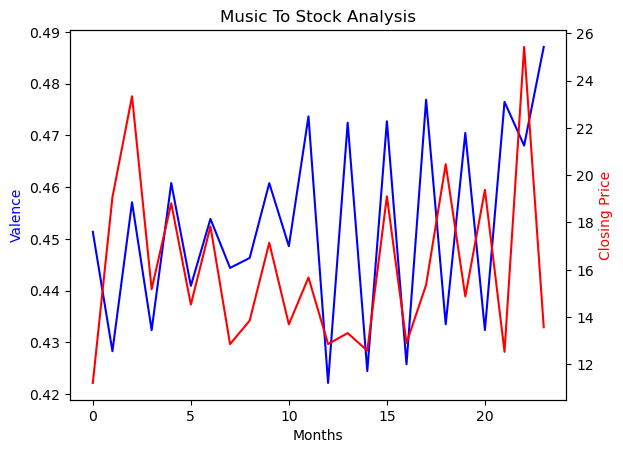

In [79]:
# create figure and axis object
fig, ax1 = plt.subplots()

# plot the 'Valence' Column on the primary y-axis
ax1.plot(df_merge_mean['valence'], color='blue')

# set the label for the primary y-axis
ax1.set_ylabel('Valence', color='blue')

# create a secondary axis object for the second dataset
ax2 = ax1.twinx()

# plot the 'Close' Column on the secondary y-axis
ax2.plot(df_merge_mean['Close'], color='red')

# set the label for the secondary y-axis
ax2.set_ylabel('Closing Price', color='red')

# set the x-axis label and title
ax1.set_xlabel('Months')
ax1.set_title('Music To Stock Analysis')

# display the graph
plt.show()

# The Nasdaq Composite (NASDAQ) and Music

### Are there behavioral patterns that are similar between music consumption (what one decides to listen to) and stock trading patterns?

#### Nasdaq Composite
* The Nasdaq Composite Index is a market capitalization-weighted index of more than 3,700 stocks listed on the Nasdaq stock exchange

In [80]:
# Load and read the data from NASDAQ

nasdaq_data_df = pd.read_csv("HistoricalData_1676331577600.csv")

In [81]:
new_nasdaq_data_df = nasdaq_data_df.drop('Date', axis=1)

In [82]:
# Display data into a table (re-organize the date column)

new_nasdaq_data_df['Month'] = pd.DatetimeIndex(nasdaq_data_df['Date']).month
new_nasdaq_data_df['Year']=pd.DatetimeIndex(nasdaq_data_df['Date']).year

In [83]:
# Rename Column 'Close/Last' to 'Closing_Price'
cleaned_nasdaq = new_nasdaq_data_df.rename(columns={"Close/Last":"Closing_Price"})

In [84]:
# View only years 2019 and 2020
 # Define the values
values = [2019, 2020]
pand_yrs = cleaned_nasdaq[cleaned_nasdaq.Year.isin(values) == True]

In [85]:
# Flip so it goes in ascending order based on year
cleaned_nasdaq.sort_values(by="Year", ascending = True)

,Closing_Price,Volume,Open,High,Low,Month,Year
1257,25.52,71128,25.46,25.8000,25.2600,2,2018
1115,22.40,87539,22.46,22.4600,22.2676,9,2018
1114,22.65,104034,22.37,22.7700,22.2300,9,2018
1113,22.37,89903,22.75,22.8000,22.1900,9,2018
1112,22.58,108116,22.31,22.6300,22.2000,9,2018
...,...,...,...,...,...,...,...
25,28.94,139026,29.07,29.1499,28.3450,1,2023
26,29.13,82728,28.72,29.3300,28.5600,1,2023
27,28.56,161646,27.60,28.6200,27.6000,1,2023
14,30.65,68057,30.72,31.2300,30.3700,1,2023


In [86]:
music_data_df = pd.read_csv("clean_music_file.csv")

In [87]:
# Integrate the various parameters for songs

music_data_df = music_data_df[['date', 'position', 'title', 'Genre', 'Explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'anger',
                     'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative',
                     'positive']]

In [88]:
new_date = []
for x in music_data_df['date']:
    date = x[3] + x[4] + x[2] + x[0] + x[1] + x[5] + x[6] + x[7] + x[8] + x[9]
    new_date.append(date)

In [89]:
music_data_df['cleaned_date'] = new_date

In [90]:
cleaned_music_df = music_data_df.drop('date', axis=1)

In [91]:
cleaned_music_df['Month'] = pd.DatetimeIndex(cleaned_music_df['cleaned_date']).month
cleaned_music_df['Year'] = pd.DatetimeIndex(cleaned_music_df['cleaned_date']).year

In [92]:
pand_yrs_music = cleaned_music_df[['title', 'Month', 'Year', 'tempo', 'valence', 'key', 'danceability',
                                 'energy']]

In [93]:
# Re-organize NASDAQ data into dataframes for the years (2019-2021) and divide by months (1=January-12=December)

#2019 Stock data

jan_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==1) & (cleaned_nasdaq['Year']==2019),:]
feb_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==2) & (cleaned_nasdaq['Year']==2019),:]
mar_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==3) & (cleaned_nasdaq['Year']==2019),:]
apr_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==4) & (cleaned_nasdaq['Year']==2019),:]
may_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==5) & (cleaned_nasdaq['Year']==2019),:]
jun_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==6) & (cleaned_nasdaq['Year']==2019),:]
jul_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==7) & (cleaned_nasdaq['Year']==2019),:]
aug_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==8) & (cleaned_nasdaq['Year']==2019),:]
sept_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==9) & (cleaned_nasdaq['Year']==2019),:]
oct_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==10) & (cleaned_nasdaq['Year']==2019),:]
nov_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==11) & (cleaned_nasdaq['Year']==2019),:]
dec_19 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==12) & (cleaned_nasdaq['Year']==2019),:]

In [94]:
#2020 Stock data
jan_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==1) & (cleaned_nasdaq['Year']==2020),:]
feb_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==2) & (cleaned_nasdaq['Year']==2020),:]
mar_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==3) & (cleaned_nasdaq['Year']==2020),:]
apr_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==4) & (cleaned_nasdaq['Year']==2020),:]
may_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==5) & (cleaned_nasdaq['Year']==2020),:]
jun_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==6) & (cleaned_nasdaq['Year']==2020),:]
jul_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==7) & (cleaned_nasdaq['Year']==2020),:]
aug_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==8) & (cleaned_nasdaq['Year']==2020),:]
sept_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==9) & (cleaned_nasdaq['Year']==2020),:]
oct_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==10) & (cleaned_nasdaq['Year']==2020),:]
nov_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==11) & (cleaned_nasdaq['Year']==2020),:]
dec_20 = cleaned_nasdaq.loc[(cleaned_nasdaq['Month']==12) & (cleaned_nasdaq['Year']==2020),:]

In [95]:
# Narrow down the closing price per month

mean_nasdaq = cleaned_nasdaq.groupby(['Month','Year']).mean().reset_index()

values = [2019, 2020]
mean_nasdaq = mean_nasdaq[mean_nasdaq.Year.isin(values) == True]

In [96]:
# View only years 2019 and 2020
 # Define the values
values = [2019, 2020]
cl_meanA = mean_nasdaq[mean_nasdaq.Year.isin(values) == True]

In [97]:
# Organize by year (in ascending order)

cl_meanA = mean_nasdaq.sort_values(["Year", "Month", "Closing_Price"], ascending = True)

# Statistics - p-values

In [98]:
# Calculate the p-values for years 2019 and 2020

p_value_prior_month = [0]
p_value_prior_year = [0,0,0,0,0,0,0,0,0,0,0,0]

months = [jan_19, feb_19, mar_19, apr_19, may_19, jun_19, jul_19, aug_19, sept_19, oct_19, nov_19, dec_19,
          jan_20, feb_20, mar_20, apr_20, may_20, jun_20, jul_20, aug_20, sept_20, oct_20, nov_20, dec_20]

counter = 0

In [99]:
while counter < (len(months)):
    if counter < (len(months)-1):
        first_month = months[counter]
        second_month = months[counter+1]
        prior_month_value = stats.ttest_ind(first_month.Closing_Price, second_month.Closing_Price, equal_var=False)
        p_value_prior_month.append(prior_month_value[1])
    
    if counter > 11:
        month_19 = months[counter]
        month_20 = months[counter-12]
        prior_year_value = stats.ttest_ind(month_19.Closing_Price, month_20.Closing_Price, equal_var=False)
        p_value_prior_year.append(prior_year_value[1])
    
    counter += 1

In [100]:
cl_meanA.loc[:, "p-Value Prior Year's Month"] = p_value_prior_month
cl_meanB = cl_meanA.reset_index(drop=True)

In [101]:
cl_meanA.loc[:, "p-Value Previous Month"] = p_value_prior_month

In [102]:
cl_meanA.loc[:, "p-value Prior Year's Month"] = p_value_prior_year
cl_meanB = cl_meanA.reset_index(drop=True)

In [103]:
music_avg_scores = pand_yrs_music.groupby(['Month','Year']).mean().reset_index()

In [104]:
music_avg_scores_2 = music_avg_scores.sort_values(["Year","Month"], ascending = True)
music_avg_scores_3 = music_avg_scores_2.loc[(music_avg_scores_2['Year']==2019)|(music_avg_scores_2['Year']==2020),:]
music_avg_scores_4 = music_avg_scores_3.reset_index(drop=True)

In [105]:
merged_data = pd.merge(cl_meanB, music_avg_scores_4,on=['Month','Year'])

In [106]:
# Clean up genre data

x = 0
genre_clean = []
while x < len(df_music_clean):
    current_genre = df_music_clean['Genre'][x]
    current_genre = str(current_genre)
    if "pop" in current_genre.lower():
        genre_clean.append('Pop')
    elif "rock" in current_genre.lower():
        genre_clean.append('Rock')
    elif "country" in current_genre.lower():
        genre_clean.append('Country')
    elif "hop" or "rap" in current_genre.lower():
        genre_clean.append('Rap')
    else:
        genre_clean.append('Other')
    x+=1

In [107]:
# Display first few rows of cleaned genre table

genre_counts = df_music_clean[['Month','Year','title']]
genre_counts.loc[:, "Genre"] = genre_clean

In [108]:
genre_counts_2 = genre_counts.drop_duplicates()

In [109]:
genre_counts_3 = genre_counts_2.groupby(['Month', 'Year', 'Genre'], dropna=False).count().reset_index()

In [110]:
genre_counts_3 = genre_counts_3.rename(columns={"title":"Count"})
genre_counts_3 = genre_counts_3.loc[(genre_counts_3['Year']==2019)|(genre_counts_3['Year']==2020),:]

In [111]:
rock_df = genre_counts_3.loc[genre_counts_3['Genre']=='Rock',:]
rock_2 = rock_df.sort_values(["Year","Month"], ascending = True)

country_df = genre_counts_3.loc[genre_counts_3['Genre']=='Country',:]
country_2 = country_df.sort_values(["Year","Month"], ascending = True)

pop_df = genre_counts_3.loc[(genre_counts_3['Genre']=='Pop'),:]
pop_2 = pop_df.sort_values(["Year","Month"], ascending = True)

rap_df = genre_counts_3.loc[genre_counts_3['Genre']=='Rap',:]
rap_2 = rap_df.sort_values(["Year","Month"], ascending = True)

other_df = genre_counts_3.loc[genre_counts_3['Genre']=='Other',:]
other_2 = other_df.sort_values(["Year","Month"], ascending = True)

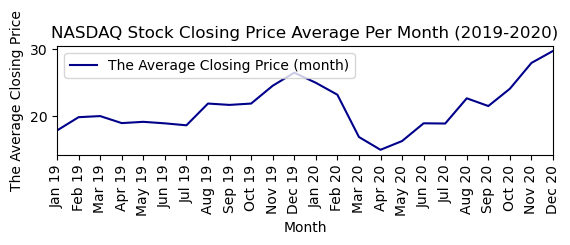

In [112]:
# NASDAQ STOCK
plt.subplot(3,1,1)
x_axis = np.arange(1,25)
plt.plot(x_axis, cl_meanB ['Closing_Price'], label="The Average Closing Price (month)", color='darkblue')

plt.legend()

months = ['Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19',
          'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19', 'Jan 20', 'Feb 20', 'Mar 20', 'Apr 20', 'May 20',
          'Jun 20', 'Jul 20', 'Aug 20', 'Sep 20', 'Oct 20', 'Nov 20', 'Dec 20']

plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("The Average Closing Price")
plt.title("NASDAQ Stock Closing Price Average Per Month (2019-2020)")
plt.show()

In [113]:
def regression_line(x_values, y_values, y_name, counter, title, graphs):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    #source:https://stackoverflow.com/questions/485789/why-do-i-get-typeerror-cant-multiply-sequence-by-non-int-of-type-float
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.subplot(graphs, 1, counter)
    plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel("Average Closing Price")
    plt.ylabel(y_name)
    plt.title(f"Closing Price vs. {title} (2019-2020)")
    
    x_mean = x_values.mean()
    y_mean = y_values.mean()
    plt.annotate(line_eq,(x_mean,y_mean),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")

    plt.show()

The r-value is: 0.09313379411464374


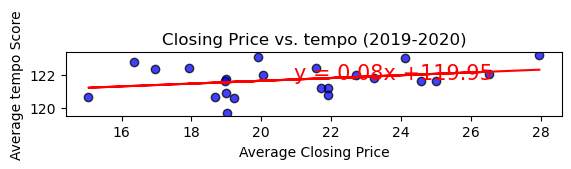

The r-value is: 0.0002502916868909225


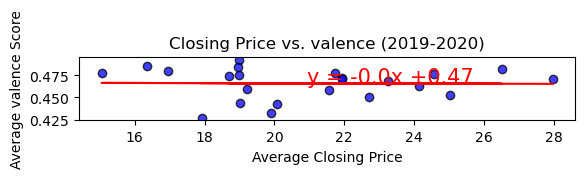

The r-value is: 0.413549101730253


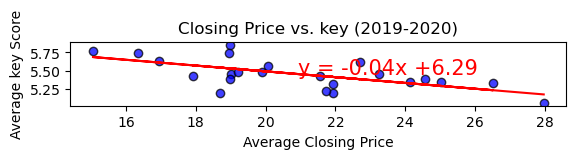

The r-value is: 0.41903826659550547


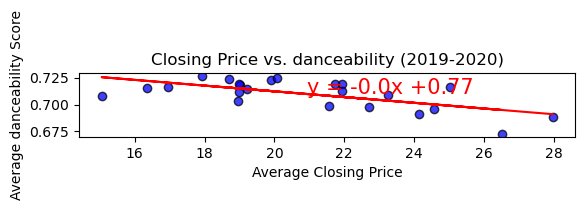

The r-value is: 0.1069088326197322


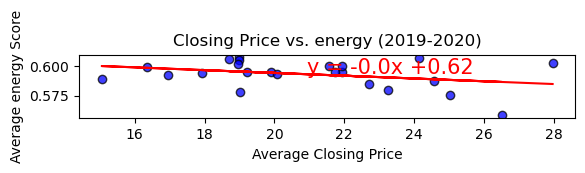

In [114]:
parameters = ['tempo', 'valence', 'key', 'danceability', 'energy']
counter = 1
for x in parameters:
    x_axis = merged_data['Closing_Price']
    y_axis = merged_data[x]
    y_name = (f"Average {x} Score")

    regression_line(x_axis, y_axis, y_name,counter, x, len(parameters))
    counter+=1